In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problème 1

## a) x = GenUniGaus(m, v, N)

Je commence par définir les fonctions que je vais utiliser.

Cette fonction permet de générer N nombres suivant une distribution normale univariée.
Elle retourne un tableau de float.

In [2]:
def GenUniGaus(N, m, v):
    return np.random.normal(m, v, N)

Cette fonction permet d'afficher un histogramme avec x un tableau de float

In [3]:
def print_GenUniGaus(x, num_bins):
    plt.hist(x, num_bins)
    plt.show()

Cette fonction permet de vérifier:
$$| m - \frac{1}{N}\sum_{i=1}^{n}X_{i} | < 0.01 $$
Elle prend en paramètre m, la moyenne, x, un tableau avec $X_{N}$ variables aléatoires, et valeur qui est la valeur qui ne doit pas être dépassée.
Elle retourne vraie si la formule du dessus est vérifiée, et faux sinon.

In [4]:
def Verification_1(m, x, valeur):
    N = len(x)
    moyenne = 0
    for i in range(N):
        moyenne += x[i]
    moyenne /= N
    if (abs(m - moyenne) < valeur):
        return True
    else:
        return False

Cette fonction permet de vérifier:
$$| v - \frac{1}{N}\sum_{i=1}^{n}(X_{i} - m)^{2} | < 0.01 $$
Elle prend en paramètre m, la moyenne, v, la variance, x, un tableau avec $X_{N}$ variables aléatoires, et valeur qui est la valeur qui ne doit pas être dépassée.
Elle retourne vraie si la formule ci-dessus est vérifiée, et faux sinon.

In [5]:
def Verification_2(m, v, x, valeur):
    N = len(x)
    var = 0
    for i in range(N):
        var += (x[i] - m)**2
    var /= N
    if (abs(v - var) < valeur):
        return True
    else:
        return False

### Tâche 1
Tracez l'histogramme pour N = 1000, m = 0, et v = 1 (en utilisant par exemple 50 bins). Ensuite, vérifiez $$| m - \frac{1}{N}\sum_{i=1}^{n}X_{i} | < 0.01 $$ et $$| v - \frac{1}{N}\sum_{i=1}^{n}(X_{i} - m)^{2} | < 0.01 $$

In [6]:
N = 1000
m = 0
v = 1
x = GenUniGaus(N, m, v)

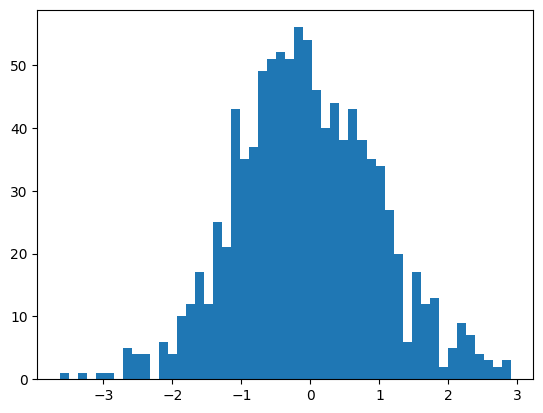

In [7]:
print_GenUniGaus(x, 50)

In [8]:
Verification_1(m, x, 0.01)

False

In [9]:
Verification_2(m, v, x, 0.01)

False

### Tâche 2
Tracez l'histogramme pour N = 100000, m = 0, et v = 1 (en utilisant par exemple 50 bins). Ensuite, vérifiez $$| m - \frac{1}{N}\sum_{i=1}^{n}X_{i} | < 0.01 $$ et $$| v - \frac{1}{N}\sum_{i=1}^{n}(X_{i} - m)^{2} | < 0.01 $$

In [10]:
N = 100000
m = 0
v = 1
x = GenUniGaus(N, m, v)

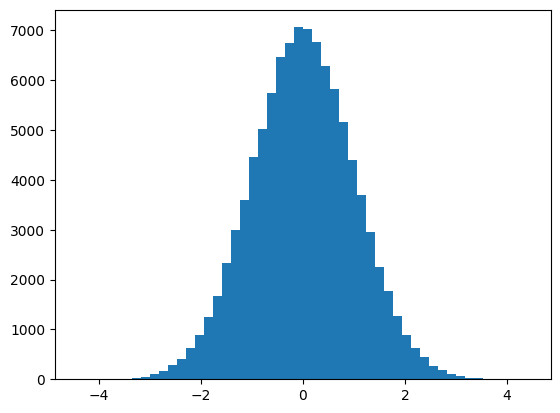

In [11]:
print_GenUniGaus(x, 50)

In [12]:
Verification_1(m, x, 0.01)

True

In [13]:
Verification_2(m, v, x, 0.01)

True

### Tâche 3
Les résultats ci-dessus sont logiques. En effet, pour les tests, plus on prend un grand nombre de valeurs générés selon une même distribution normale, plus on se rapproche de la loi normale. C'est le principe de la loi faible des grands nombres... Si on prend un grand échantillon de valeurs, on va tendre vers notre loi de probabilité et la moyenne empirique de nos échantillons s'écartera de moins en moins de la moyenne calculée de la loi.

## b) vec = GenMultiGaus(N, m, Cov)

In [14]:
def GenMultiGaus(N, m, Cov):
    return np.random.multivariate_normal(m, Cov, N)

### Tâche 1
Essayez la fonction avec $m_{x} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ et $K_{xx} =
\begin{bmatrix} 1&0 \\ 0&1 \end{bmatrix}$

In [15]:
m_x1 = [0, 0]
K_x1 = [[1, 0], [0, 1]]
result1 = GenMultiGaus(1000, m_x1, K_x1)
print(result1)

[[ 0.59926508 -1.46841354]
 [ 0.12326198  0.60880608]
 [-0.99102871 -0.60409147]
 ...
 [ 2.30752939  0.54134545]
 [ 1.001687   -1.71742729]
 [ 0.09691481 -0.08782016]]


### Tâche 2
Essayez la fonction avec $m_{x} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ et $K_{xx} =
\begin{bmatrix} 1&0.8 \\ 0.8&1 \end{bmatrix}$

In [16]:
m_x2 = [0, 1]
K_x2 = [[1, 0.8], [0.8, 1]]
result2 = GenMultiGaus(1000, m_x2, K_x2)
print(result2)

[[-0.8870413   0.24374506]
 [-0.49725411  0.20115503]
 [ 0.76013634  3.49411003]
 ...
 [ 0.57612734  1.90144831]
 [-1.84700711 -0.98346541]
 [ 3.12222809  3.17104099]]


### Tâche 3
Essayez la fonction avec $m_{x} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$ et $K_{xx} =
\begin{bmatrix} 3.40&-2.75&-2.00 \\ -2.75&5.50&1.50 \\ -2.00&1.50&1.25 \end{bmatrix}$

In [17]:
m_x3 = [0, 0, 0]
K_x3 = [[3.40, -2.75, -2.00],
        [-2.75, 5.50, 1.50],
        [-2.00, 1.50, 1.25]]
result3 = GenMultiGaus(1000, m_x3, K_x3)
print(result3)

[[ 0.47715767 -1.16483513 -0.48841541]
 [-0.87164582 -1.11870245  0.38015782]
 [-3.34837854  6.85026122  1.26474985]
 ...
 [ 1.93935254 -2.46056836 -1.17061408]
 [-0.34633779  0.10052594  0.39516628]
 [ 0.65810294  0.27227606 -0.19756035]]


## Tâche 4

Tracez les distributions marginales 2D des Tâches 1 et 2, ainsi que la distribution 3D de la Tâche
3 pour N = 1000.

In [18]:
def distrib_marginale_2D(result):
    x1 = []
    y1 = []
    for i in np.arange(len(result)):
        x1.append(result[i][0])
        y1.append(result[i][1])
    plt.plot(x1, y1, "o")
    plt.show()

Voici la distribution marginale 2D de la Tâche 1:

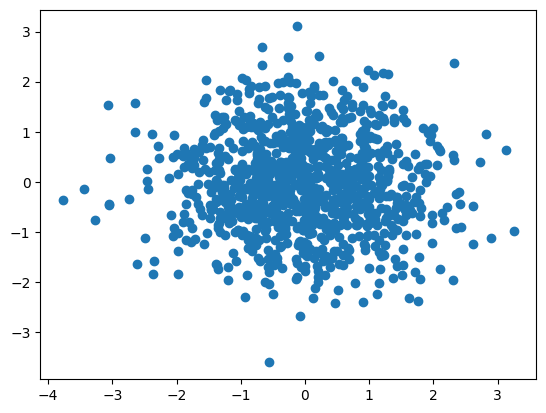

In [19]:
distrib_marginale_2D(result1)

Voici la distribution marginale 2D de la Tâche 2:

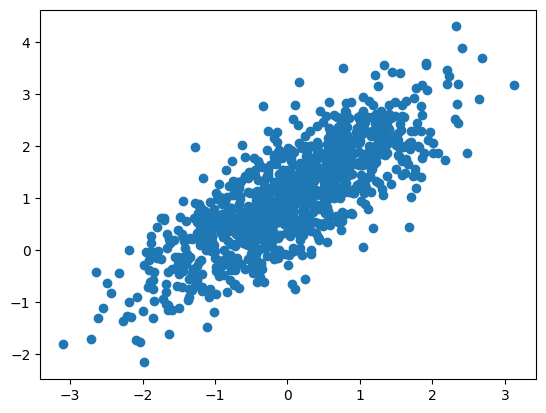

In [20]:
distrib_marginale_2D(result2)

In [21]:
def distrib_marginale_3D(result):
    x = []
    y = []
    z = []
    ax = plt.axes(projection = '3d')
    for i in np.arange(len(result)):
        x.append(result[i][0])
        y.append(result[i][1])
        z.append(result[i][2])
    ax.scatter3D(x, y, z, "o")
    plt.show()

Voici la distribution 3D de la Tâche 3:

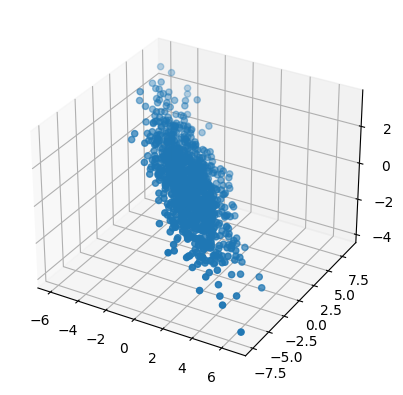

In [22]:
distrib_marginale_3D(result3)